In [1]:
'''
The core data type in Numpy is the ndarray, which enables fast and space-efficient multidimensional array processing.
Note: This notebook is adapted from chapter 4 Python for Data Analysis by Wes McKinney and O'Reilly publishing. NumPy has many, 
many features that won't be covered here. The following snippets are just to illustrate basic data types and operations within
numpy.

Another good resource for learning more about ndarrays is here:
http://docs.scipy.org/doc/numpy/reference/arrays.html
'''

#First, import NumPy
import numpy as np

#It is easy to create Nx1 and NxM arrays from standard Python lists
l1 = [0,1,2]
l2 = [3,4,5]

nd1 = np.array(l1)
nd2 = np.array([l1,  l2])

In [2]:
#Now, we can get ask for some basic info to describe the ndarray
def desc_ndarray(nd):
    try:
        print("The ndarray has dimension n=%s and m=%s" % (nd.shape[0],nd.shape[1]))
    except:
        print("The ndarray has dimension n=%s and m=1" % nd.shape[0])
    print("The ndarray has elements of type=%s" % nd.dtype)

desc_ndarray(nd1)

desc_ndarray(nd2)



The ndarray has dimension n=3 and m=1
The ndarray has elements of type=int64
The ndarray has dimension n=2 and m=3
The ndarray has elements of type=int64


In [3]:
#There are short cuts for creating certain frequently used special ndarrays, i.e.,

k=4

#1. an ndarray of all zeros
zero = np.zeros(k)

#2. an ndarray of all ones
one = np.ones(k)

#3. an ndarray of random elements (this one is standard normal, but there are many distributions to choose from)
rand = np.random.randn(k)

[zero, one, rand]

[array([0., 0., 0., 0.]),
 array([1., 1., 1., 1.]),
 array([ 0.0030948 , -0.26996601, -1.24398329, -1.70177842])]

In [4]:
'''
For indexing an array:
1. If nx1 array, follow the same protocol as a regular Python list
2. If nxm array use the following examples
'''

arr2d = np.random.randn(4,2)

#A single index gets a full row

#2 indexes returns a value
[arr2d, arr2d[1],  arr2d[1,1]]

[array([[-0.20207034,  1.61682753],
        [ 0.71984551,  0.21305453],
        [-0.23224371, -0.08503735],
        [ 0.24525545, -1.29060416]]),
 array([0.71984551, 0.21305453]),
 0.21305453473586158]

In [5]:
'''
Operations between Arrays and Scalars
An important feature of ndarrays is they allow batch operations on data without writing any for loops.  
This is called vectorization.
Any arithmetic operations between equal-size arrays applies the operation elementwise. 
'''

#examples

k = 4
rand = np.random.randn(k)
[rand, rand + rand, 2*rand, rand*np.zeros(4)]



[array([-1.59629167, -0.21458685,  0.82521036,  0.32745471]),
 array([-3.19258334, -0.4291737 ,  1.65042072,  0.65490941]),
 array([-3.19258334, -0.4291737 ,  1.65042072,  0.65490941]),
 array([-0., -0.,  0.,  0.])]

In [6]:
'''
Matrix operations
It is easy to do matrix operations with Nd arrays. The standard arithmetic operators don't work here though. And it is important 
to make sure matrix shapes are compatible
'''

k = 3
r1 = np.random.randn(k)
r2 = np.random.randn(k)

#Matrix addition is the standard matrix operator
[r1, r2 , r1 + r2]


[array([ 1.72621442, -0.89294325,  0.58183986]),
 array([-0.62763554,  0.69813715, -1.86053985]),
 array([ 1.09857888, -0.19480611, -1.27869999])]

In [7]:
#The Transpose can be taken with the attribute T
arr2d = np.array([r1, r2])
[arr2d, arr2d.T]

[array([[ 1.72621442, -0.89294325,  0.58183986],
        [-0.62763554,  0.69813715, -1.86053985]]),
 array([[ 1.72621442, -0.62763554],
        [-0.89294325,  0.69813715],
        [ 0.58183986, -1.86053985]])]

In [8]:
'''
Matrix multiplication, like inner products can be done on arrays.
Just remember that the standard multiplication operator does elementwise multiplication (provided they are the same shape).
We need the dot method in order to do an inner product

Numpy has a linalg library that can run most matrix operations on ndarrays:
http://docs.scipy.org/doc/numpy/reference/routines.linalg.html

One can also create a matrix object and use the methods in numpy.matrix to achieve the same thing:
http://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html
'''

[arr2d, arr2d * arr2d, arr2d.dot(arr2d.T)]

[array([[ 1.72621442, -0.89294325,  0.58183986],
        [-0.62763554,  0.69813715, -1.86053985]]),
 array([[2.97981623, 0.79734765, 0.33853762],
        [0.39392637, 0.48739547, 3.46160852]]),
 array([[ 4.1157015 , -2.78936661],
        [-2.78936661,  4.34293036]])]

In [9]:
'''
One important feature of vectorization is that it allows elementwise processing that is much faster than writing a traditional
loop.
'''
import math

#show an example and profile i
%timeit [math.sqrt(x) for x in range(1000)]

10000 loops, best of 3: 180 µs per loop


In [10]:
%timeit np.sqrt(np.arange(1000))

The slowest run took 14.61 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 6.38 µs per loop


In [11]:
'''
The last thing we'll cover in this module is the numpy.random library. In general, it is advised to use numpy for
random number generation as opposed to python's built in random module.

Random number generation has many uses. One common use is generating fake (i.e. random) data to test modeling procedures
or to do Monte Carlo Simulations
'''
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:


#Generate random pairs that have a multivariate normal distribution
N = 1000
mu = np.array([0,0])
cov = 0.5
sig = np.array([[1, cov],[cov, 1]]) #Must be square, symmetric and non-negative definite

In [13]:
x, y = np.random.multivariate_normal(mu, sig, N).T

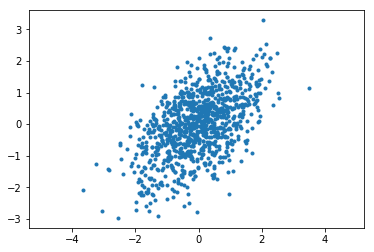

In [14]:

#Now let's plot and see what that looks like


plt.plot(x, y,'.') 
plt.axis('equal') 
plt.show()



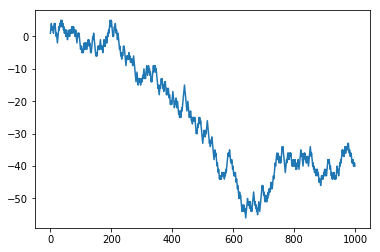

In [15]:
'''
One final example (taken from Wes Mckinney's book):

Let's generate a random walk and visualize it
'''

nsteps = 1000
draws = np.random.randint(0, 2, size = nsteps) #Randint let's us generate random integers in a range
steps = np.where(draws > 0, 1, -1) #there function let's us do boolean logic on a conditional applied to an entire array
walk = steps.cumsum() #Cumsum returns an array with the same size as steps, that has cum sum of steps up to index i
plt.plot(np.arange(len(walk)), walk)
plt.show()